In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_file_path = 'C:/Users/yassi/Documents/Business intelligence/LAB_2/titanic_train.csv'
test_file_path = 'C:/Users/yassi/Documents/Business intelligence/LAB_2/titanic_test.csv'

data_trained = pd.read_csv(train_file_path)
data_tested = pd.read_csv(test_file_path)

print(data_trained.info())
print(data_trained.describe())

# Visualize data distributions and relationships
sns.countplot(x='Survived', data=data_trained)
plt.title('Survival Counts')
plt.show()

#Visualization of pairplot
sns.pairplot(data_trained, hue='Survived')
plt.title('Pairplot with Survival')
plt.show()

The ticket class feature appears to differentiate survivors from non-survivors . The first-class has a higher proportion of survivors compared to other classes. 
The age distribution seems quite similar for survivors and non-survivors. However, the survivors appear to be young is likely reflecting that most children survived. 
Siblings/spouses aboard and parents/children aboard features’ charts represent the distribution of family members aboard. Here, there is no clear separation, but we can see that SibSp or Parch = 0 result in passengers both surviving and not surviving. 
There is a visible positive trend for people who paid a higher fare to survive.

In [1]:
#Missing values ?? 
data_trained['Age'].fillna(data_trained['Age'].median(), inplace=True)
data_tested['Age'].fillna(data_tested['Age'].median(), inplace=True)

#categorical convert ton numeric to studie it
data_trained['Sex'] = data_trained['Sex'].map({'female': 1, 'male': 0}).astype(int)
data_tested['Sex'] = data_tested['Sex'].map({'female': 1, 'male': 0}).astype(int)

# One-hot encoding for Embarked
train_data = pd.get_dummies(data_trained, columns=['Embarked'], drop_first=True)
data_tested = pd.get_dummies(data_tested, columns=['Embarked'], drop_first=True)


NameError: name 'data_trained' is not defined

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare the data for training with many variables
X = train_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_data['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

# Random Forest
rforest_model = RandomForestClassifier()
rforest_model.fit(X_train, y_train)


RandomForestClassifier()

In [24]:
#Decision tree model results 
from sklearn.metrics import accuracy_score
dtree_pred = dtree_model.predict(X_val)
# Accuracy
dt_accuracy = accuracy_score(y_val, dtree_pred)
print(f"Decision Tree Accracy: {dt_accuracy}")


Decision Tree Accracy: 0.7318435754189944


In [25]:
#Random forest model results
from sklearn.metrics import accuracy_score
rforest_pred = rforest_model.predict(X_val)
# Accuracy
rforest_accuracy = accuracy_score(y_val, rforest_pred)
print(f"Random Forest Accuracy: {rforest_accuracy}")

Random Forest Accuracy: 0.8379888268156425


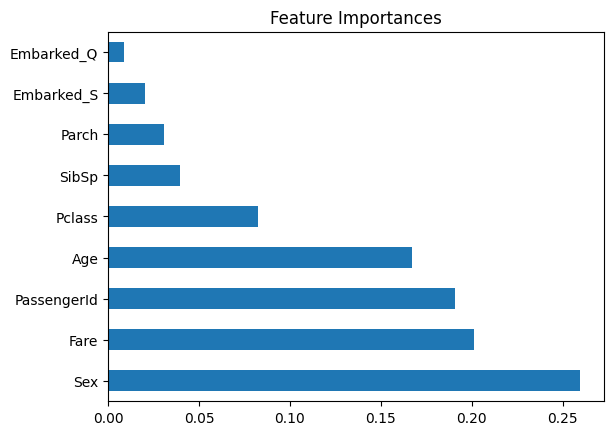

In [26]:
# Feature importance from Random Forest 
feature_importances = pd.Series(rforest_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()


1) Sex
Most important factor here it seems your chance to survive to the sink of titanic depend on your sex. Thats could be real because of historical record seems show if you are   a woman you may have the priority on lifeboats
2) PassengerId
This second ranking of passenger IDs is somewhat surprising given that passenger IDs are usually generated randomly, but it is possible that the passenger IDs are correlated with the information of the different passengers.
3) Fare 
Attribute also holds a substantial significance, suggesting that the amount paid by a passenger may be associated with their survival probability. Higher fares might correspond to upper-class tickets, potentially offering better access to lifeboats.
4) Age 
Feature shows moderate importance. Historical data suggests that age played a role in survival, with children being more likely to survive.